# ***GUN VIOLENCE DATASET IN USA*** 

## **Integrantes**

### **Santiago Ituyan Figueroa**
### **Victor Andres Martinez Preciado**
### **Juan Estevan Viera Cano**

# **Contexto**

*Este conjunto de datos nos proporciona una vista profunda a los casos de tiroteos masivos en Estados Unidos durante el presente año 2024. El dataset contiene datos de incidentes ocurridos hasta el 20 de Octubre de 2024 provenientes del "Gun Violence Archive".*

*Capta detalles esenciales como la identificacion del incidente, la fecha, el estado, la ciudad, la cantidad de victimas (muertas y heridas) y los sospechosos involucrados. Ademas, se incluyen coordenadas geograficas para permitir el analisis espacial de las tendencias de la violencia relacionada a armas de fuego*

# **Link del DATASET**

### *https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1?resource=download*

# **Atributos de Columnas**

*  **Incident IDs:** El ID de cada incidente para identificarlos individualmente
*  **Incident Date:** La fecha de cada incidente
*  **State and City/County:** El estado y la ciudad o estado del incidente
*  **Victims Killed:** La cantidad de victimas asesinadas
*  **Victims Injured:** La cantidad de victimas lastimadas
*  **Suspects Killed:** La cantidad de sospechosos asesinados
*  **Suspects Injured:** La cantidad de sospechosos lastimados
*  **Suspects Arrested:** La cantidad de sospechosos arrestados
* **Suspects:** La cantidad de sospechosos total de cada incidente
* **Latitude - Longitude:** Las coordenadas del incidente dividido en las dos columnas de latitud y longitud
* **Coordinates_Found:** Un valor booleano donde se muestra si se encontraron coordenadas o no

In [ ]:
# Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate as tb
import folium as fl
from folium.plugins import HeatMap
from babel.dates import format_date as fd
import matplotlib.dates as mdates
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('./Gun_violence_Dataset_US.csv')

In [73]:
print(tb(df, headers = 'keys', tablefmt = 'simple'))

       Incident ID  Incident Date       State                 City Or County                 Address                                       Victims Killed    Victims Injured    Suspects Killed    Suspects Injured    Suspects Arrested    Operations    Latitude    Longitude  Coordinates_Found
---  -------------  ------------------  --------------------  -----------------------------  ------------------------------------------  ----------------  -----------------  -----------------  ------------------  -------------------  ------------  ----------  -----------  -------------------
  0        3052758  October 21, 2024    Washington            Fall City                      7700 block of Lake Alice Rd SE                             5                  1                  0                   0                    1           nan     47.5681    -121.891   Yes
  1        3052028  October 20, 2024    Tennessee             Jackson                        2310 N Highland Ave                           

**Observamos que el DataSet tiene columnas con coordenadas, por lo que decidimos usarlarlas para crear un mapa de calor sobre los incidentes y asi mismo, ver en que regiones se concentran más**

In [74]:
#  El mapa lo realizamos con ayuda de videos sobre la libreria 'Folium' y de ChatGPT.

# Crear un mapa centrado en una ubicación promedio
mapa = fl.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Preparar los datos para el HeatMap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Agregar la capa de calor al mapa
HeatMap(heat_data).add_to(mapa)

mapa

## **Analisis Basico**

In [ ]:
#  Tamaño del DataSet

df.shape

(427, 14)

In [75]:
df.head(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        427 non-null    int64  
 1   Incident Date      427 non-null    object 
 2   State              427 non-null    object 
 3   City Or County     427 non-null    object 
 4   Address            426 non-null    object 
 5   Victims Killed     427 non-null    int64  
 6   Victims Injured    427 non-null    int64  
 7   Suspects Killed    427 non-null    int64  
 8   Suspects Injured   427 non-null    int64  
 9   Suspects Arrested  427 non-null    int64  
 10  Operations         0 non-null      float64
 11  Latitude           427 non-null    float64
 12  Longitude          427 non-null    float64
 13  Coordinates_Found  427 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 46.8+ KB


In [77]:
df.dtypes

Incident ID            int64
Incident Date         object
State                 object
City Or County        object
Address               object
Victims Killed         int64
Victims Injured        int64
Suspects Killed        int64
Suspects Injured       int64
Suspects Arrested      int64
Operations           float64
Latitude             float64
Longitude            float64
Coordinates_Found     object
dtype: object

In [78]:
df.describe()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude
count,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,0.0,427.000000,427.000000
mean,2.929432e+06,1.000000,4.437939,0.070258,0.063232,0.711944,NaN,36.941819,-88.791959
std,6.876031e+04,1.210285,2.849555,0.264896,0.271030,1.178414,NaN,4.934289,12.976850
min,2.791411e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.449910,-166.739450
25%,2.879320e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,33.449545,-91.910580
50%,2.939030e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN,37.687490,-86.811790
75%,2.982807e+06,1.000000,5.000000,0.000000,0.000000,1.000000,NaN,40.692450,-80.735325
max,3.052758e+06,8.000000,28.000000,2.000000,2.000000,7.000000,NaN,68.349440,-70.256650


## **Arreglo de Errores**

In [79]:
#  Creamos una copia antes de empezar a realizar cambios

df_copy = df.copy()

In [80]:
#  Cambiamos los nombres de las columnas para que todas queden en español

df_copy = df_copy.set_axis(['ID Incidente', 'Fecha del Incidente', 'Estado', 'Ciudad', 'Direccion', 'Victimas Asesinadas',
                            'Victimas Heridas', 'Sospechosos Asesinados', 'Sospechosos Heridos','Sospechosos Arrestados', 
                            'Operaciones', 'Latitud', 'Longitud', 'Coordenadas Encontradas'], axis = 1)

In [81]:
print(tb(df_copy.head(), headers = 'keys', tablefmt = 'simple'))

      ID Incidente  Fecha del Incidente    Estado        Ciudad        Direccion                             Victimas Asesinadas    Victimas Heridas    Sospechosos Asesinados    Sospechosos Heridos    Sospechosos Arrestados    Operaciones    Latitud    Longitud  Coordenadas Encontradas
--  --------------  ---------------------  ------------  ------------  ----------------------------------  ---------------------  ------------------  ------------------------  ---------------------  ------------------------  -------------  ---------  ----------  -------------------------
 0         3052758  October 21, 2024       Washington    Fall City     7700 block of Lake Alice Rd SE                          5                   1                         0                      0                         1            nan    47.5681   -121.891   Yes
 1         3052028  October 20, 2024       Tennessee     Jackson       2310 N Highland Ave                                     1                   8         

In [82]:
#  Cambiamos la columna que almacena las fechas de los incidentes al formato correspondiente con DateTime.

df_copy['Fecha del Incidente'] = pd.to_datetime(df_copy['Fecha del Incidente'])

In [83]:
# Confirmamos el cambio de tipo

df_copy.dtypes

ID Incidente                        int64
Fecha del Incidente        datetime64[ns]
Estado                             object
Ciudad                             object
Direccion                          object
Victimas Asesinadas                 int64
Victimas Heridas                    int64
Sospechosos Asesinados              int64
Sospechosos Heridos                 int64
Sospechosos Arrestados              int64
Operaciones                       float64
Latitud                           float64
Longitud                          float64
Coordenadas Encontradas            object
dtype: object

In [84]:
#  Organizamos los datos de forma cronologica. 

df_copy.sort_values(by = 'Fecha del Incidente', inplace = True)
df_copy.reset_index(drop = True, inplace = True)

df_copy

,ID Incidente,Fecha del Incidente,Estado,Ciudad,Direccion,Victimas Asesinadas,Victimas Heridas,Sospechosos Asesinados,Sospechosos Heridos,Sospechosos Arrestados,Operaciones,Latitud,Longitud,Coordenadas Encontradas
0,2840907,2024-01-01,Illinois,Maywood,1500 block of St Charles Rd,2,2,0,0,1,NaN,41.88796,-87.83922,Yes
1,2792720,2024-01-01,Missouri,Springfield,5485 W Sunshine St,0,4,0,0,1,NaN,37.20897,-93.29159,Yes
2,2791411,2024-01-01,California,Los Angeles,2350 Porter St,2,8,0,0,0,NaN,34.05357,-118.24545,Yes
3,2792829,2024-01-01,Louisiana,Baton Rouge,4600 block of W Brookstown Dr,1,3,0,0,3,NaN,30.44335,-91.18664,Yes
4,2794194,2024-01-04,Iowa,Perry,1200 18th St,2,5,1,0,0,NaN,41.83854,-94.10560,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,3050940,2024-10-19,Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes
423,3051041,2024-10-19,Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes
424,3051984,2024-10-20,Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes
425,3052028,2024-10-20,Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes


In [85]:
#  Las columnas 'Operaciones' y 'Coordenadas Encontradas' no aportan informacion, entonces las eliminamos

df_copy = df_copy.drop(columns = ['Operaciones', 'Coordenadas Encontradas'])

In [86]:
print(tb(df_copy.head(), headers = 'keys', tablefmt = 'simple'))

      ID Incidente  Fecha del Incidente    Estado      Ciudad       Direccion                        Victimas Asesinadas    Victimas Heridas    Sospechosos Asesinados    Sospechosos Heridos    Sospechosos Arrestados    Latitud    Longitud
--  --------------  ---------------------  ----------  -----------  -----------------------------  ---------------------  ------------------  ------------------------  ---------------------  ------------------------  ---------  ----------
 0         2840907  2024-01-01 00:00:00    Illinois    Maywood      1500 block of St Charles Rd                        2                   2                         0                      0                         1    41.888     -87.8392
 1         2792720  2024-01-01 00:00:00    Missouri    Springfield  5485 W Sunshine St                                 0                   4                         0                      0                         1    37.209     -93.2916
 2         2791411  2024-01-01 00:00:00    C

## **1) ¿Cual es la fecha en la que ocurrieron más incidentes?**

In [87]:
#  con el metodo value_counts() podemos hacer un dataframe

df_fechas = df_copy['Fecha del Incidente'].value_counts()
df_fechas

Fecha del Incidente
2024-03-31    9
2024-07-04    8
2024-06-23    8
2024-07-05    8
2024-07-28    8
             ..
2024-10-06    1
2024-10-11    1
2024-10-09    1
2024-10-14    1
2024-10-21    1
Name: count, Length: 188, dtype: int64

In [88]:
#  Con el metodo idmax() podemos sacar el indice del valor mayor del DataFrame

df_fechas.idxmax()

Timestamp('2024-03-31 00:00:00')

In [89]:
fecha = df_fechas.idxmax() 
incidentes = df_fechas.max()

In [90]:
# Con la libreria babel podemos cambiar el formato de la fecha y ademas ponerlo en español

fecha_formateada = fd(fecha, format="full", locale="es_ES")

In [91]:
print(f'''La fecha en la que ocurrieron más incidentes fue el {fecha_formateada}
Cantidad de incidentes en esa fecha: {incidentes} Incidentes''')

La fecha en la que ocurrieron más incidentes fue el domingo, 31 de marzo de 2024
Cantidad de incidentes en esa fecha: 9 Incidentes


## **2) ¿Cual es la evolución del numero de incidentes por fecha a lo largo del tiempo?**

In [92]:
#  Reseteamos los indices del DataFrame que creamos usando value_counts()

df_fechas = df_fechas.reset_index()

In [93]:
# Ahora renombramos las columnas para tener claro el indice de los valores
# Ademas, organizamos el DataFrame de acuerdo a la cronologia de la columna 'Fecha del Incidente'

df_fechas.columns = ['Fecha del Incidente', 'Cantidad de Incidentes']
df_fechas.sort_values(by = 'Fecha del Incidente', inplace = True)

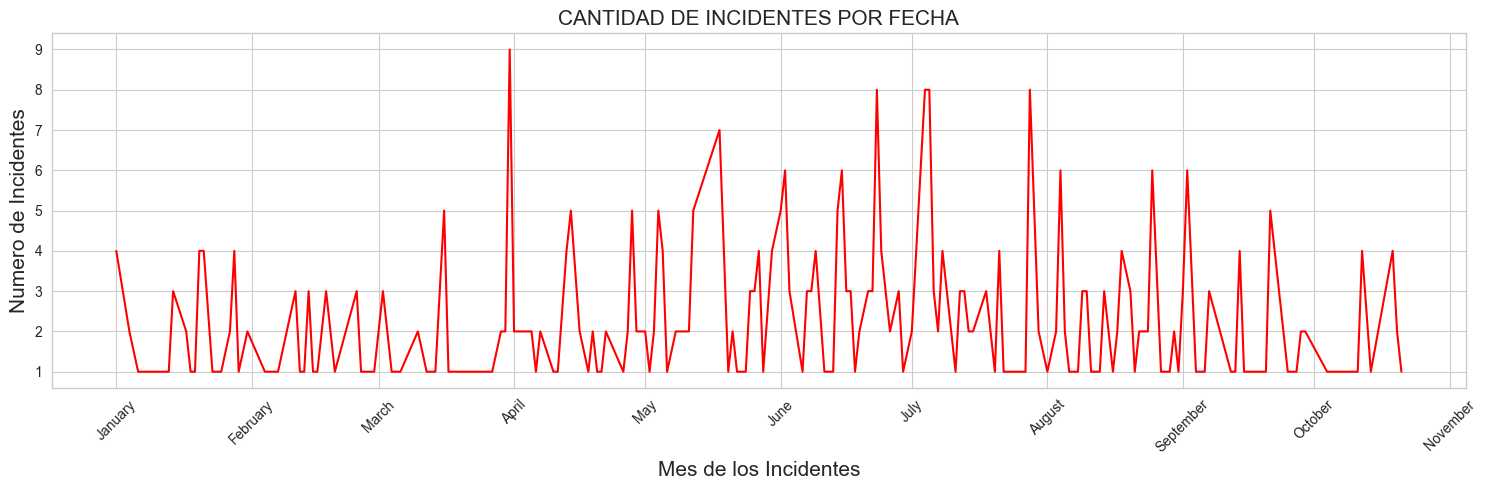

In [140]:
# Grafica de lineas


#  Creamos un plot, el cual nos permite ver como evoluciona una un fenomeno con base en el tiempo

plt.figure(figsize=(15,5))
plt.plot(df_fechas['Fecha del Incidente'], df_fechas['Cantidad de Incidentes'], color = 'r')


#  Con una propiedad de MatPlotLib importada como mdates, localizamos el mes dentro de las fechas
#  registradas en el eje x, y le cambiamos el formato para que solo muestre el mes
#  Ademas, lo rotamos 45 grados

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(lambda x, pos: mdates.DateFormatter('%B')(x).capitalize())
plt.xticks(rotation = 45)

plt.xlabel("Mes de los Incidentes", fontsize=15)
plt.ylabel("Numero de Incidentes", fontsize=15)
plt.title("CANTIDAD DE INCIDENTES POR FECHA", fontsize=15)

plt.grid(True)
plt.tight_layout()
plt.show()

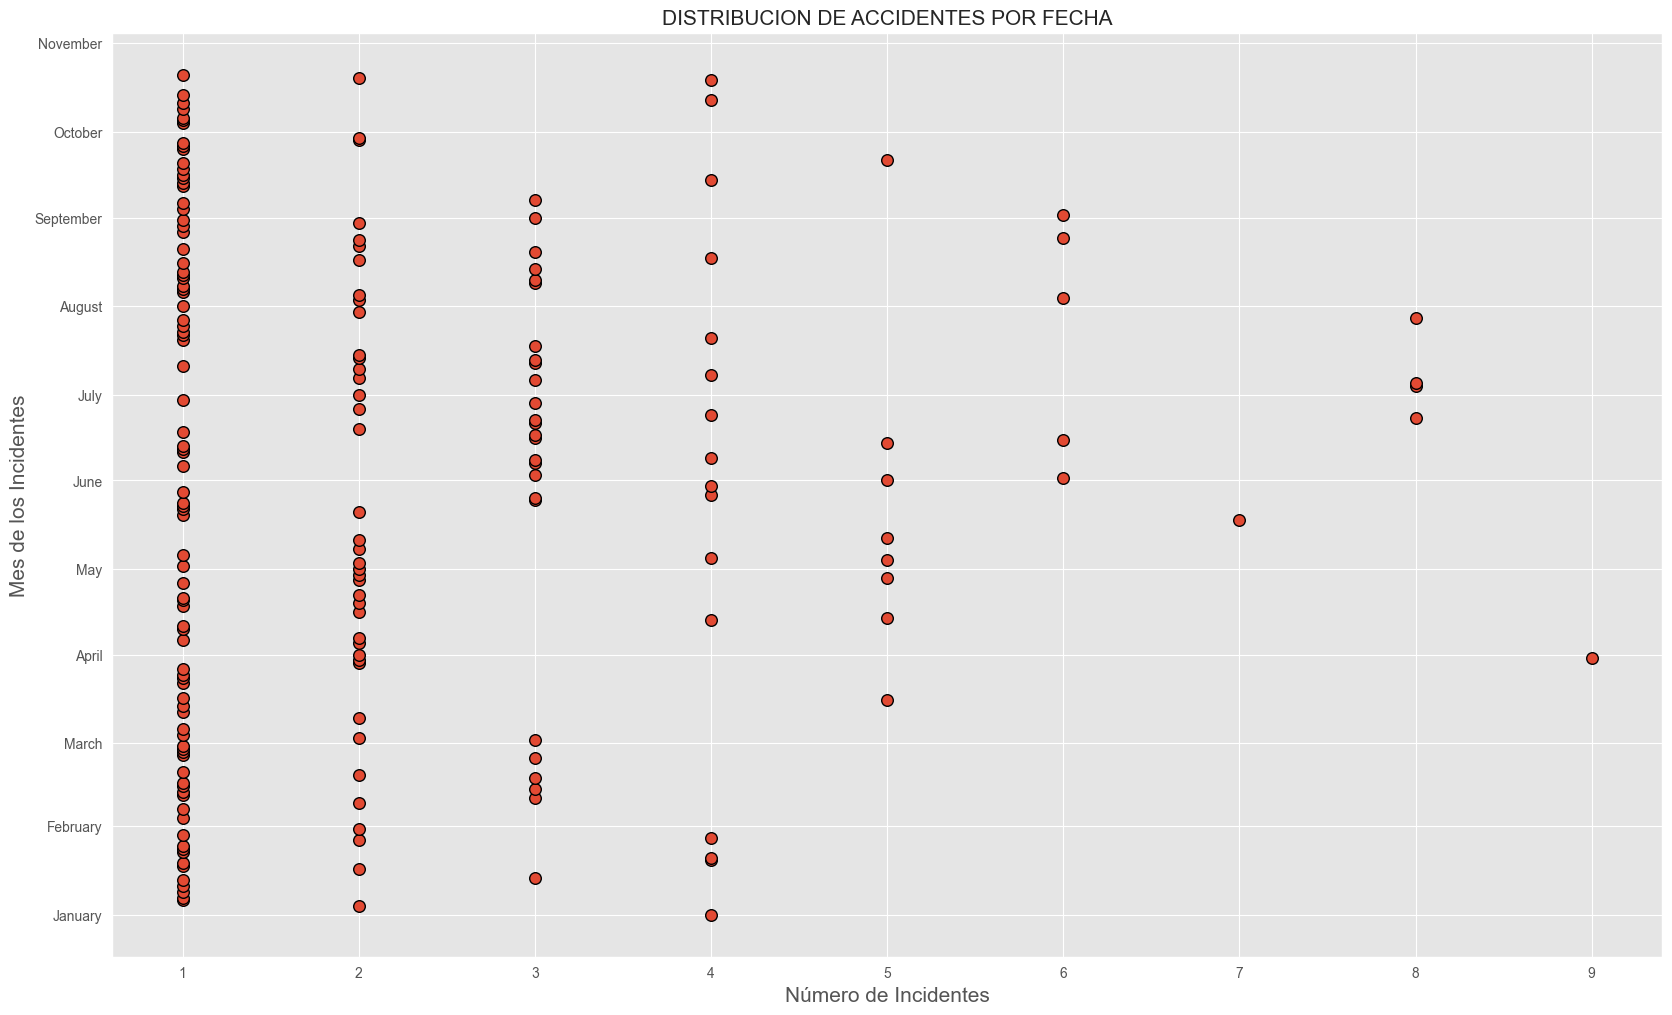

In [95]:
#  Grafico de distribucion
size = 20
plt.figure(figsize=(20, 12))
plt.scatter(df_fechas['Cantidad de Incidentes'],df_fechas['Fecha del Incidente'],s = (70), marker='o', edgecolors='black', linewidths= 1)

plt.gca().yaxis.set_major_locator(mdates.MonthLocator())
plt.gca().yaxis.set_major_formatter(lambda y, pos: mdates.DateFormatter('%B')(y).capitalize())

plt.xlabel('Número de Incidentes', fontsize=15)
plt.ylabel('Mes de los Incidentes', fontsize=15)
plt.title('DISTRIBUCION DE ACCIDENTES POR FECHA', fontsize=15)
plt.grid(True)
plt.show()

## **3) ¿Cual es la cantidad total de Victimas asesinadas y heridas en total?**

In [96]:
killed = df_copy['Victimas Asesinadas'].sum()

print(f"La cantidad total de victimas asesinadas es de {killed}")

La cantidad total de victimas asesinadas es de 427


In [97]:
injured = df_copy['Victimas Heridas'].sum()

print(f"La cantidad total de victimas asesinadas es de {injured}")

La cantidad total de victimas asesinadas es de 1895


In [98]:
total_victims = df_copy['Victimas Asesinadas'] + df_copy['Victimas Heridas']  

print(f"La cantidad de victimas TOTALES es de {total_victims.sum()}")

La cantidad de victimas TOTALES es de 2322


In [99]:
datos = {'Estado de Victima': ['Asesinadas', 'Heridas', 'Total'],
        'Numero de Victimas': [killed, injured, total_victims.sum()]}
df_datos = pd.DataFrame(datos)

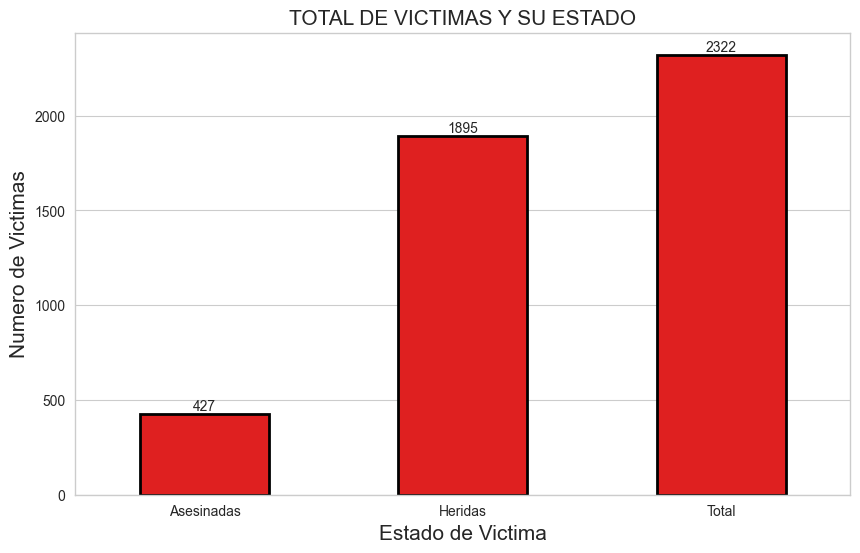

In [144]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
sns.barplot(data = datos, x = 'Estado de Victima', y = 'Numero de Victimas', width=0.5, color = 'red', alpha = 1, edgecolor='black', linewidth=2)

for i, valor in enumerate(df_datos['Numero de Victimas']):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.xlabel('Estado de Victima', fontsize=15)
plt.ylabel('Numero de Victimas', fontsize=15)
plt.title('TOTAL DE VICTIMAS Y SU ESTADO', fontsize=15)

plt.show()

## **4) ¿Cual es la cantidad de sospechosos asesinados, heridos y arrestados en total?**

In [101]:
sus_killed = df_copy['Sospechosos Asesinados'].sum()

print(f"La cantidad total de sospechosos asesinados fue de {sus_killed}")

La cantidad total de sospechosos asesinados fue de 30


In [102]:
sus_injured = df_copy['Sospechosos Heridos'].sum()

print(f"La cantidad total de sospechosos heridos fue de {sus_injured}")

La cantidad total de sospechosos heridos fue de 27


In [103]:
sus_arrested = df_copy['Sospechosos Arrestados'].sum()

print(f"La cantidad total de sospechosos arrestados fue de {sus_arrested}")

La cantidad total de sospechosos arrestados fue de 304


In [104]:
sus_total = df_copy['Sospechosos Asesinados'] + df_copy['Sospechosos Heridos'] + df_copy['Sospechosos Arrestados']

print(f"La cantidad TOTAL de sospechosos fue de {sus_total.sum()}")

La cantidad TOTAL de sospechosos fue de 361


In [105]:
sus_datos = {'Estado de Sospechoso': ['Asesinados', 'Heridos', 'Arrestados','Total'],
            'Numero de Sospechosos': [sus_killed,sus_injured, sus_arrested, sus_total.sum()]}
df_susdatos = pd.DataFrame(sus_datos)

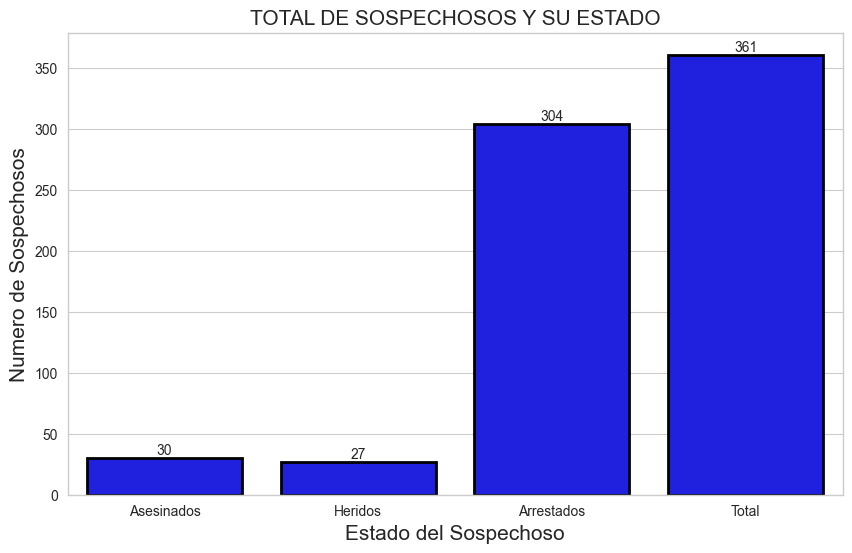

In [145]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
sns.barplot(data = sus_datos, x = 'Estado de Sospechoso', y = 'Numero de Sospechosos',  color = 'blue', edgecolor ='black', linewidth = 2)

for i, valor in enumerate(df_susdatos['Numero de Sospechosos']):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.title('TOTAL DE SOSPECHOSOS Y SU ESTADO', fontsize=15)
plt.xlabel('Estado del Sospechoso', fontsize=15)
plt.ylabel('Numero de Sospechosos', fontsize=15)
plt.show()

## **5) ¿Cual es la cantidad de incidentes por estado?**


In [107]:
estados_ataques = df_copy.groupby('Estado')['Estado'].value_counts()
estados_ataques = pd.DataFrame(estados_ataques)
print(tb(estados_ataques, headers = 'keys', tablefmt = 'simple'))

Estado                  count
--------------------  -------
Alabama                    21
Alaska                      1
Arizona                     3
Arkansas                    6
California                 28
Colorado                    3
Connecticut                 3
Delaware                    1
District of Columbia       12
Florida                    25
Georgia                    19
Hawaii                      1
Illinois                   32
Indiana                    10
Iowa                        1
Kansas                      2
Kentucky                   11
Louisiana                  14
Maine                       1
Maryland                    5
Massachusetts               6
Michigan                   12
Minnesota                   8
Mississippi                20
Missouri                   21
Nebraska                    1
Nevada                      2
New Jersey                  3
New Mexico                  1
New York                   15
North Carolina             13
Ohio      

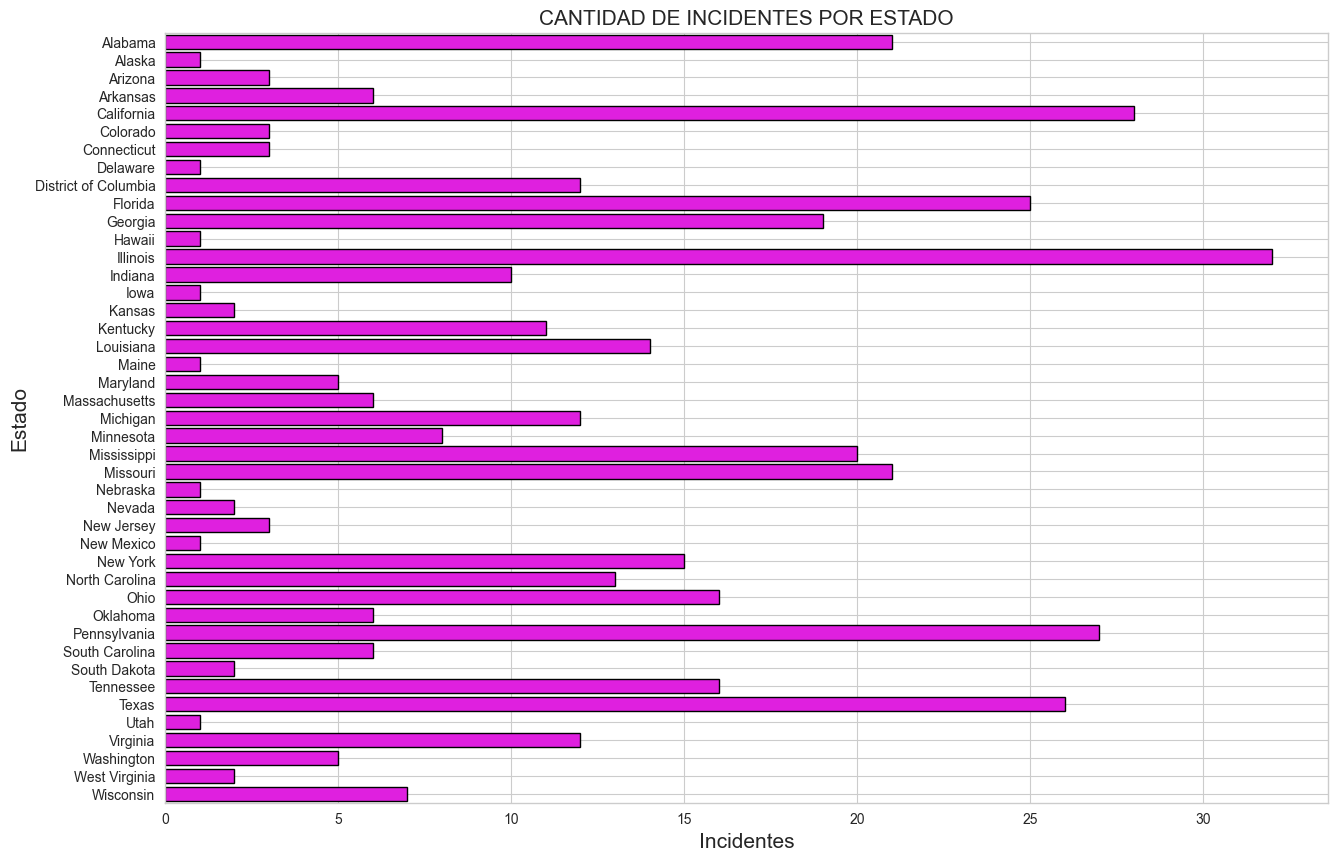

In [148]:
plt.figure(figsize=(15, 10))
sns.barplot(data = estados_ataques, x = 'count' , y = 'Estado',  color = 'magenta', edgecolor ='black', linewidth = 1)


plt.title('CANTIDAD DE INCIDENTES POR ESTADO', fontsize = 15)
plt.xlabel('Incidentes', fontsize=15)
plt.ylabel('Estado', fontsize=15)
# Mostrar el gráfico

plt.grid(True)
plt.show()

*Observamos que el estado con más incidentes es Illinois*

## **6) ¿Cual es la cantidad de victimas heridas por estado?**

In [109]:
injured_victims = df_copy.groupby('Estado')['Victimas Heridas'].sum()
injured_victims = pd.DataFrame(injured_victims)

print(tb(injured_victims, headers = 'keys', tablefmt = 'simple'))

Estado                  Victimas Heridas
--------------------  ------------------
Alabama                              109
Alaska                                 2
Arizona                               10
Arkansas                              33
California                           117
Colorado                              10
Connecticut                            9
Delaware                               4
District of Columbia                  49
Florida                               98
Georgia                               81
Hawaii                                 2
Illinois                             128
Indiana                               56
Iowa                                   5
Kansas                                 8
Kentucky                              47
Louisiana                             60
Maine                                  3
Maryland                              18
Massachusetts                         30
Michigan                              74
Minnesota       

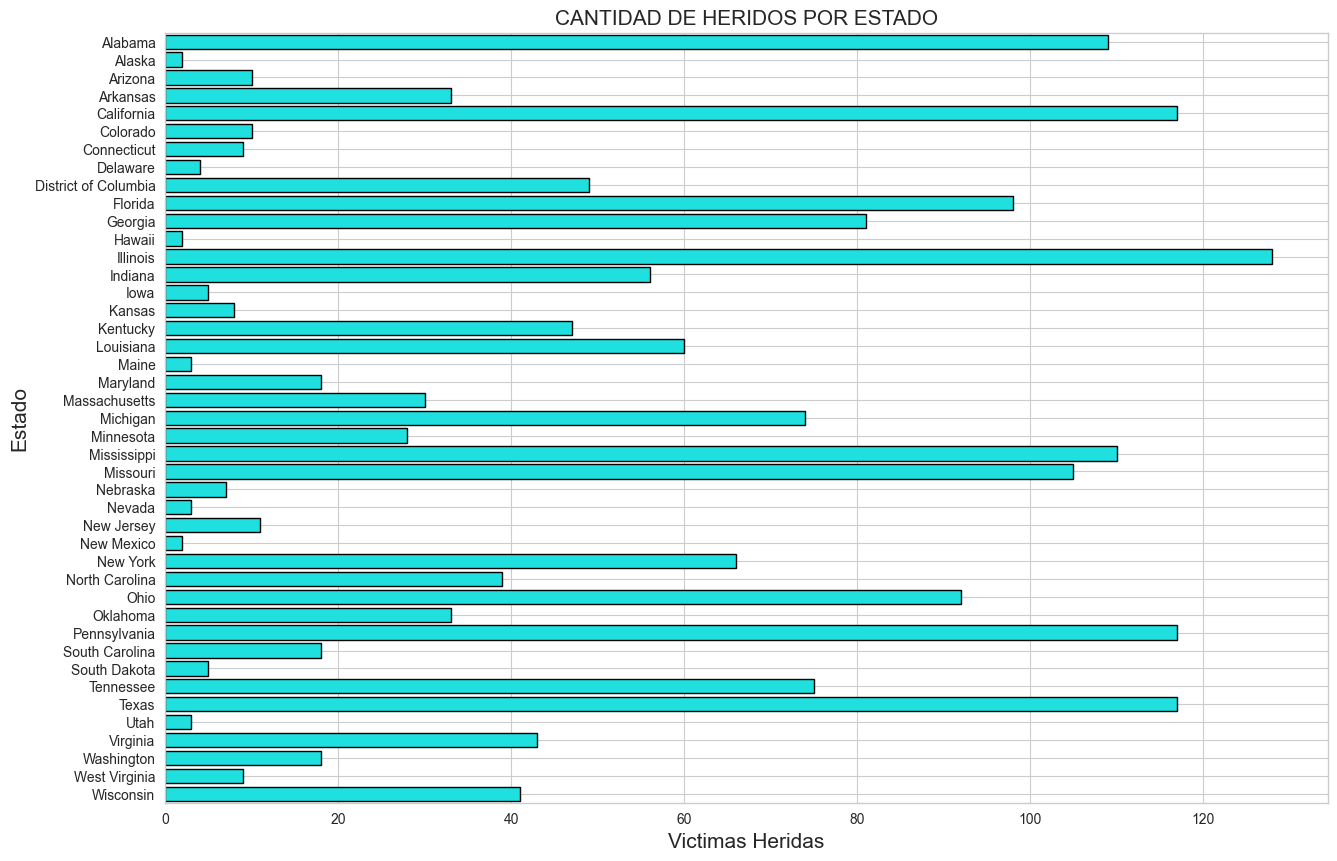

In [110]:
plt.figure(figsize=(15, 10))
sns.barplot(data = injured_victims, x = 'Victimas Heridas', y = 'Estado', color = 'cyan', edgecolor ='black', linewidth = 1)

plt.title('CANTIDAD DE HERIDOS POR ESTADO', fontsize = 15)
plt.xlabel('Victimas Heridas', fontsize=15)
plt.ylabel('Estado', fontsize=15)
# Mostrar el gráfico

plt.grid(True)
plt.show()

## **7) Del estado con más incidentes, ¿Cual es la ciudad con más incidentes?**


In [111]:
# filtramos por todas las entradas que existen de Illinois
ciudades_estado_mayor = df_copy[df_copy['Estado']== 'Illinois']
print(tb(ciudades_estado_mayor, headers = 'keys', tablefmt = 'simple'))

       ID Incidente  Fecha del Incidente    Estado    Ciudad             Direccion                         Victimas Asesinadas    Victimas Heridas    Sospechosos Asesinados    Sospechosos Heridos    Sospechosos Arrestados    Latitud    Longitud
---  --------------  ---------------------  --------  -----------------  ------------------------------  ---------------------  ------------------  ------------------------  ---------------------  ------------------------  ---------  ----------
  0         2840907  2024-01-01 00:00:00    Illinois  Maywood            1500 block of St Charles Rd                         2                   2                         0                      0                         1    41.888     -87.8392
 22         2808531  2024-01-21 00:00:00    Illinois  Joliet             200 block of Davis St                               8                   1                         1                      0                         1    41.5249    -88.0846
 23         2807473 

In [142]:
ciudades_mayor = ciudades_estado_mayor.groupby('Ciudad')['Ciudad'].value_counts().sort_values(ascending = False)
ciudades_mayor = pd.DataFrame(ciudades_mayor)
print(tb(ciudades_mayor, headers = 'keys', tablefmt = 'simple'))

Ciudad               count
-----------------  -------
Chicago                 25
Champaign                1
Forest Park              1
Joliet                   1
Maywood                  1
Oak Forest               1
Pembroke Township        1
Tinley Park              1


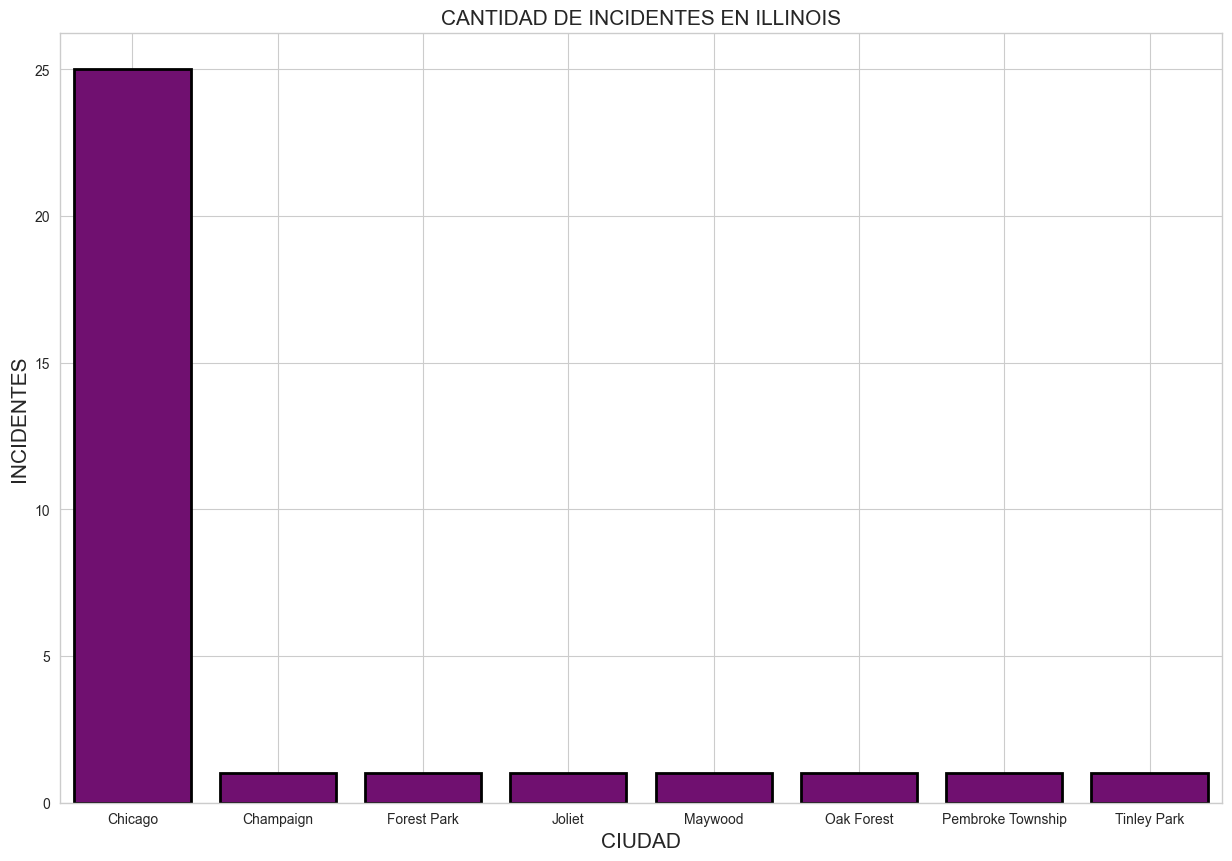

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data = ciudades_mayor, x = 'Ciudad', y = 'count', color = 'purple', edgecolor ='black', linewidth = 2)

plt.title('CANTIDAD DE INCIDENTES EN ILLINOIS', fontsize = 15)
plt.xlabel('CIUDAD', fontsize=15)
plt.ylabel('INCIDENTES', fontsize=15)
# Mostrar el gráfico

plt.grid(True)
plt.show()

## **8) ¿Cuales son los estados con menos incidentes?**


In [114]:
# filtramos por los estados que en el dataframe de total de ataques es igual a 1

estados_menor = estados_ataques[estados_ataques['count']==1]

print('Los estados con menos incidentes son:')

# eliminamos la columna count porque todos son valores 1

estados_menor.pop('count')
print(tb(estados_menor, headers = 'keys', tablefmt = 'simple'))

Los estados con menos incidentes son:
Estado
----------
Alaska
Delaware
Hawaii
Iowa
Maine
Nebraska
New Mexico
Utah


## **9) ¿Cual es el promedio de victimas asesinadas por mes?**


In [115]:
df_mensual = df_copy.groupby(df_copy['Fecha del Incidente'].dt.month_name())['Victimas Asesinadas'].mean()
df_mensual = pd.DataFrame(df_mensual)

print(tb(df_mensual, headers = 'keys', tablefmt = 'simple'))

Fecha del Incidente      Victimas Asesinadas
---------------------  ---------------------
April                               0.783784
August                              0.653846
February                            1.33333
January                             1.81579
July                                1
June                                0.791667
March                               1.05882
May                                 0.942308
October                             1.11765
September                           1


In [116]:
# Lista ordenada de los nombres de los meses
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October"
]

# Convertir la columna del índice a un tipo categórico ordenado
df_mensual.index = pd.CategoricalIndex(df_mensual.index, categories=month_order, ordered=True)

# Ordenar el DataFrame por los meses ordenados
df_mensual = df_mensual.sort_index()
print(tb(df_mensual, headers = 'keys', tablefmt = 'simple'))

Fecha del Incidente      Victimas Asesinadas
---------------------  ---------------------
January                             1.81579
February                            1.33333
March                               1.05882
April                               0.783784
May                                 0.942308
June                                0.791667
July                                1
August                              0.653846
September                           1
October                             1.11765


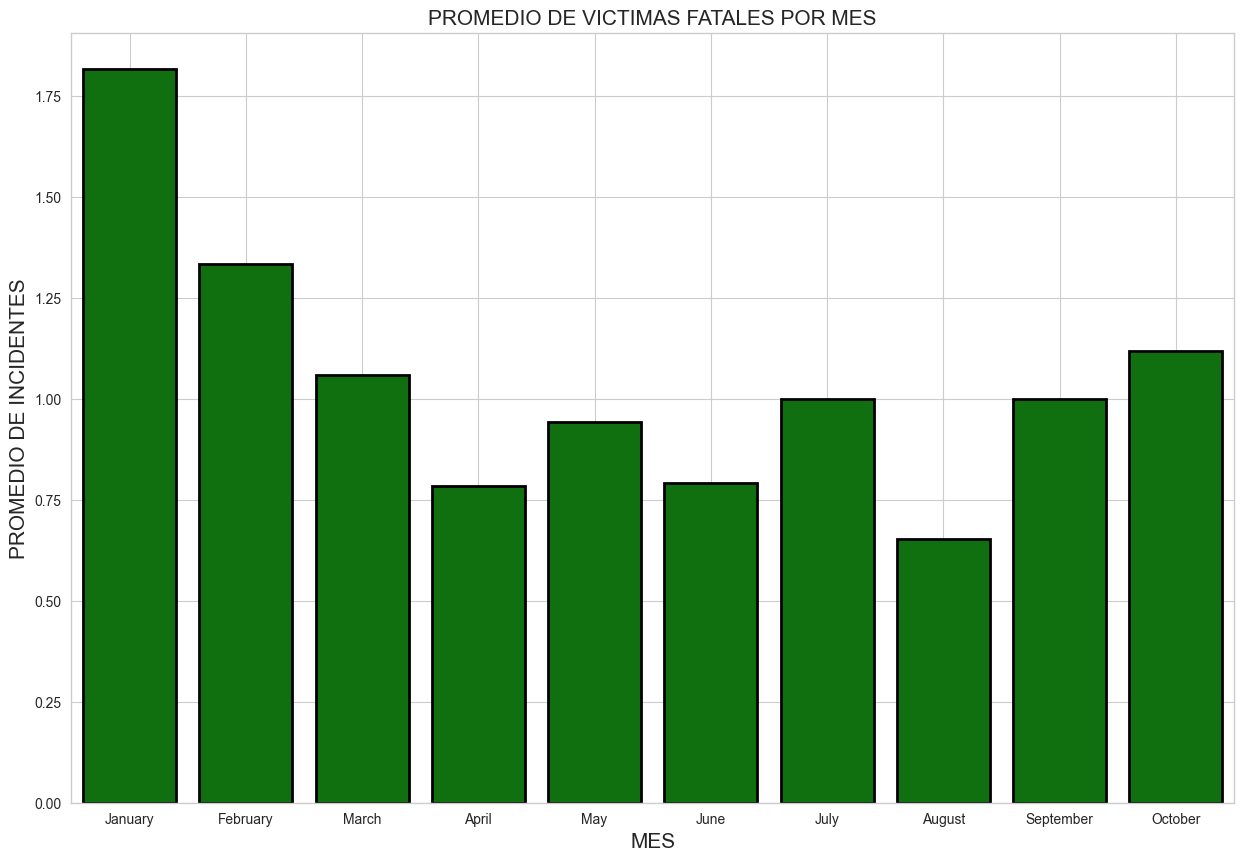

In [153]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df_mensual, x = 'Fecha del Incidente', y = 'Victimas Asesinadas', color = 'green', edgecolor ='black', linewidth = 2)

plt.title('PROMEDIO DE VICTIMAS FATALES POR MES', fontsize = 15)
plt.xlabel('MES', fontsize=15)
plt.ylabel('PROMEDIO DE INCIDENTES', fontsize=15)
# Mostrar el gráfico

plt.grid(True)
plt.show()

## **10) ¿Cual fue el trimestre con más incidentes?**


In [118]:
## Filtrado por fechas PRIMER SEMESTRE

# Definir el rango de fechas
fecha_inicio = '2024-01-01'
fecha_fin = '2024-03-31'

# Convertir las fechas de inicio y fin a formato datetime
fecha_inicio = pd.to_datetime(fecha_inicio)
fecha_fin = pd.to_datetime(fecha_fin)

# Filtrar el DataFrame por el rango de fechas
filtro = (df_copy['Fecha del Incidente'] >= fecha_inicio) & (df_copy['Fecha del Incidente'] <= fecha_fin)

In [134]:
df_filtro = df_copy[filtro]
print(tb(df_filtro, headers = 'keys', tablefmt = 'simple'))

      ID Incidente  Fecha del Incidente    Estado                Ciudad                      Direccion                                Victimas Asesinadas    Victimas Heridas    Sospechosos Asesinados    Sospechosos Heridos    Sospechosos Arrestados    Latitud    Longitud
--  --------------  ---------------------  --------------------  --------------------------  -------------------------------------  ---------------------  ------------------  ------------------------  ---------------------  ------------------------  ---------  ----------
 0         2840907  2024-01-01 00:00:00    Illinois              Maywood                     1500 block of St Charles Rd                                2                   2                         0                      0                         1    41.888     -87.8392
 1         2792720  2024-01-01 00:00:00    Missouri              Springfield                 5485 W Sunshine St                                         0                   4           

In [120]:
primer_trimestre = df_filtro.groupby(df_filtro['Fecha del Incidente'])['Victimas Asesinadas'].sum()
primer_trimestre = pd.DataFrame(primer_trimestre)
total1 = primer_trimestre['Victimas Asesinadas'].sum()

print(tb(primer_trimestre, headers = 'keys', tablefmt = 'simple'))

Fecha del Incidente      Victimas Asesinadas
---------------------  ---------------------
2024-01-01 00:00:00                        5
2024-01-04 00:00:00                        3
2024-01-06 00:00:00                        4
2024-01-07 00:00:00                        0
2024-01-09 00:00:00                        2
2024-01-11 00:00:00                        0
2024-01-13 00:00:00                        4
2024-01-14 00:00:00                        4
2024-01-17 00:00:00                        2
2024-01-18 00:00:00                        1
2024-01-19 00:00:00                        3
2024-01-20 00:00:00                        6
2024-01-21 00:00:00                       16
2024-01-23 00:00:00                        6
2024-01-24 00:00:00                        1
2024-01-25 00:00:00                        0
2024-01-27 00:00:00                        4
2024-01-28 00:00:00                        5
2024-01-29 00:00:00                        0
2024-01-31 00:00:00                        3
2024-02-04

In [121]:
print(f"La cantidad de victimas asesinadas en el primer trimestre fue de {total1}")

La cantidad de victimas asesinadas en el primer trimestre fue de 141


In [122]:
## Filtrado por fechas SEGUNDO SEMESTRE

# Definir el rango de fechas
fecha_inicio1 = '2024-04-01'
fecha_fin1 = '2024-06-30'

# Convertir las fechas de inicio y fin a formato datetime
fecha_inicio1 = pd.to_datetime(fecha_inicio1)
fecha_fin1 = pd.to_datetime(fecha_fin1)

# Filtrar el DataFrame por el rango de fechas
filtro1 = (df_copy['Fecha del Incidente'] >= fecha_inicio1) & (df_copy['Fecha del Incidente'] <= fecha_fin1)

In [123]:
df_filtro1 = df_copy[filtro1]
df_filtro1

,ID Incidente,Fecha del Incidente,Estado,Ciudad,Direccion,Victimas Asesinadas,Victimas Heridas,Sospechosos Asesinados,Sospechosos Heridos,Sospechosos Arrestados,Latitud,Longitud
99,2868907,2024-04-01,Michigan,Eastpointe,19000 block of Dijon Ave,0,4,0,0,0,42.46823,-82.95542
100,2872358,2024-04-01,Louisiana,New Iberia,600 block of Breaux Alley,0,4,0,1,2,30.00531,-91.81776
101,2872754,2024-04-05,Florida,West Palm Beach,1170 W 27th St,1,3,0,0,1,26.71440,-80.05329
102,2872340,2024-04-05,Arkansas,North Little Rock,116 Curtis Sykes Dr,1,3,0,0,1,34.75606,-92.26761
103,2872613,2024-04-06,Florida,Miami (Doral),3450 NW 83rd Ave,1,7,1,0,0,25.82147,-80.33198
...,...,...,...,...,...,...,...,...,...,...,...,...
255,2951432,2024-06-26,California,Lancaster,800 block of E Ave J-12,2,5,0,0,2,34.69920,-118.14482
256,2953462,2024-06-28,Nebraska,Crete,1200 block of Crestline Dr,0,7,1,0,0,40.62524,-96.96175
257,2952577,2024-06-28,Texas,Corpus Christi,2600 block of Buford St,2,3,0,0,0,27.79641,-97.40389
258,2952812,2024-06-28,New York,Niagara Falls,11th St and La Salle Ave,0,4,0,0,0,43.09600,-79.05551


In [124]:
segundo_trimestre = df_filtro1.groupby(df_filtro1['Fecha del Incidente'])['Victimas Asesinadas'].sum()
segundo_trimestre = pd.DataFrame(segundo_trimestre)
total2 = segundo_trimestre['Victimas Asesinadas'].sum()

print(tb(segundo_trimestre, headers = 'keys', tablefmt = 'simple'))

Fecha del Incidente      Victimas Asesinadas
---------------------  ---------------------
2024-04-01 00:00:00                        0
2024-04-05 00:00:00                        2
2024-04-06 00:00:00                        1
2024-04-07 00:00:00                        1
2024-04-10 00:00:00                        1
2024-04-11 00:00:00                        1
2024-04-13 00:00:00                        3
2024-04-14 00:00:00                        3
2024-04-16 00:00:00                        2
2024-04-18 00:00:00                        0
2024-04-19 00:00:00                        0
2024-04-20 00:00:00                        2
2024-04-21 00:00:00                        1
2024-04-22 00:00:00                        4
2024-04-26 00:00:00                        0
2024-04-27 00:00:00                        1
2024-04-28 00:00:00                        3
2024-04-29 00:00:00                        4
2024-05-01 00:00:00                        0
2024-05-02 00:00:00                        1
2024-05-03

In [125]:
print(f"La cantidad de victimas asesinadas en el primer trimestre fue de {total2}")

La cantidad de victimas asesinadas en el primer trimestre fue de 135


In [126]:
## Filtrado por fechas TERCER SEMESTRE

# Definir el rango de fechas
fecha_inicio2 = '2024-07-01'
fecha_fin2 = '2024-09-30'

# Convertir las fechas de inicio y fin a formato datetime
fecha_inicio12 = pd.to_datetime(fecha_inicio2)
fecha_fin2 = pd.to_datetime(fecha_fin2)

# Filtrar el DataFrame por el rango de fechas
filtro2 = (df_copy['Fecha del Incidente'] >= fecha_inicio2) & (df_copy['Fecha del Incidente'] <= fecha_fin2)

In [127]:
df_filtro2 = df_copy[filtro2]
df_filtro2

,ID Incidente,Fecha del Incidente,Estado,Ciudad,Direccion,Victimas Asesinadas,Victimas Heridas,Sospechosos Asesinados,Sospechosos Heridos,Sospechosos Arrestados,Latitud,Longitud
260,2956748,2024-07-01,Pennsylvania,Philadelphia,2700 Dickinson St,1,3,0,1,1,39.95222,-75.16218
261,2955181,2024-07-01,Missouri,Charleston,700 South St,0,5,0,0,1,36.92180,-89.35006
262,2958345,2024-07-04,Illinois,Chicago,7100 block of S Woodlawn Ave,3,2,0,0,0,41.88425,-87.63245
263,2959184,2024-07-04,Pennsylvania,Philadelphia,1900 block of Salford St,1,8,0,0,0,39.95222,-75.16218
264,2960159,2024-07-04,Tennessee,Nashville,200 1st Ave S,0,4,0,0,0,36.16784,-86.77816
...,...,...,...,...,...,...,...,...,...,...,...,...
405,3037040,2024-09-27,South Carolina,Woodruff,115 Griffin Rd,3,1,0,0,0,34.74011,-82.03601
406,3037002,2024-09-28,North Carolina,Henderson,1110 S Garnett St,0,5,0,0,0,36.33006,-78.39848
407,3036055,2024-09-28,District of Columbia,Washington,2700 block of Langston Pl SE,1,3,0,0,0,38.89037,-77.03196
408,3036427,2024-09-29,Virginia,Danville,510 Spring St,1,3,0,0,1,36.58598,-79.41720


In [128]:
tercer_trimestre = df_filtro2.groupby(df_filtro2['Fecha del Incidente'])['Victimas Asesinadas'].sum()
tercer_trimestre = pd.DataFrame(tercer_trimestre)
total3 = tercer_trimestre['Victimas Asesinadas'].sum()

print(tb(tercer_trimestre, headers = 'keys', tablefmt = 'simple'))

Fecha del Incidente      Victimas Asesinadas
---------------------  ---------------------
2024-07-01 00:00:00                        1
2024-07-04 00:00:00                       10
2024-07-05 00:00:00                        3
2024-07-06 00:00:00                        4
2024-07-07 00:00:00                        3
2024-07-08 00:00:00                        3
2024-07-10 00:00:00                        5
2024-07-11 00:00:00                        0
2024-07-12 00:00:00                        1
2024-07-13 00:00:00                        5
2024-07-14 00:00:00                        0
2024-07-15 00:00:00                        1
2024-07-18 00:00:00                        7
2024-07-20 00:00:00                        1
2024-07-21 00:00:00                        6
2024-07-22 00:00:00                        1
2024-07-23 00:00:00                        0
2024-07-25 00:00:00                        1
2024-07-27 00:00:00                        1
2024-07-28 00:00:00                        7
2024-07-30

In [129]:
print(f"La cantidad de victimas asesinadas en el primer trimestre fue de {total3}")

La cantidad de victimas asesinadas en el primer trimestre fue de 132


In [130]:
trimestres = {
    'labels': ['Primer Semestre', 'Segundo Semestre', 'Tercer Semestre'],
    'trimestres':[total1, total2, total3 ]
    
}

In [131]:
df_trimestres = pd.DataFrame(trimestres)
print(tb(df_trimestres, headers = 'keys', tablefmt = 'simple'))

    labels              trimestres
--  ----------------  ------------
 0  Primer Semestre            141
 1  Segundo Semestre           135
 2  Tercer Semestre            132


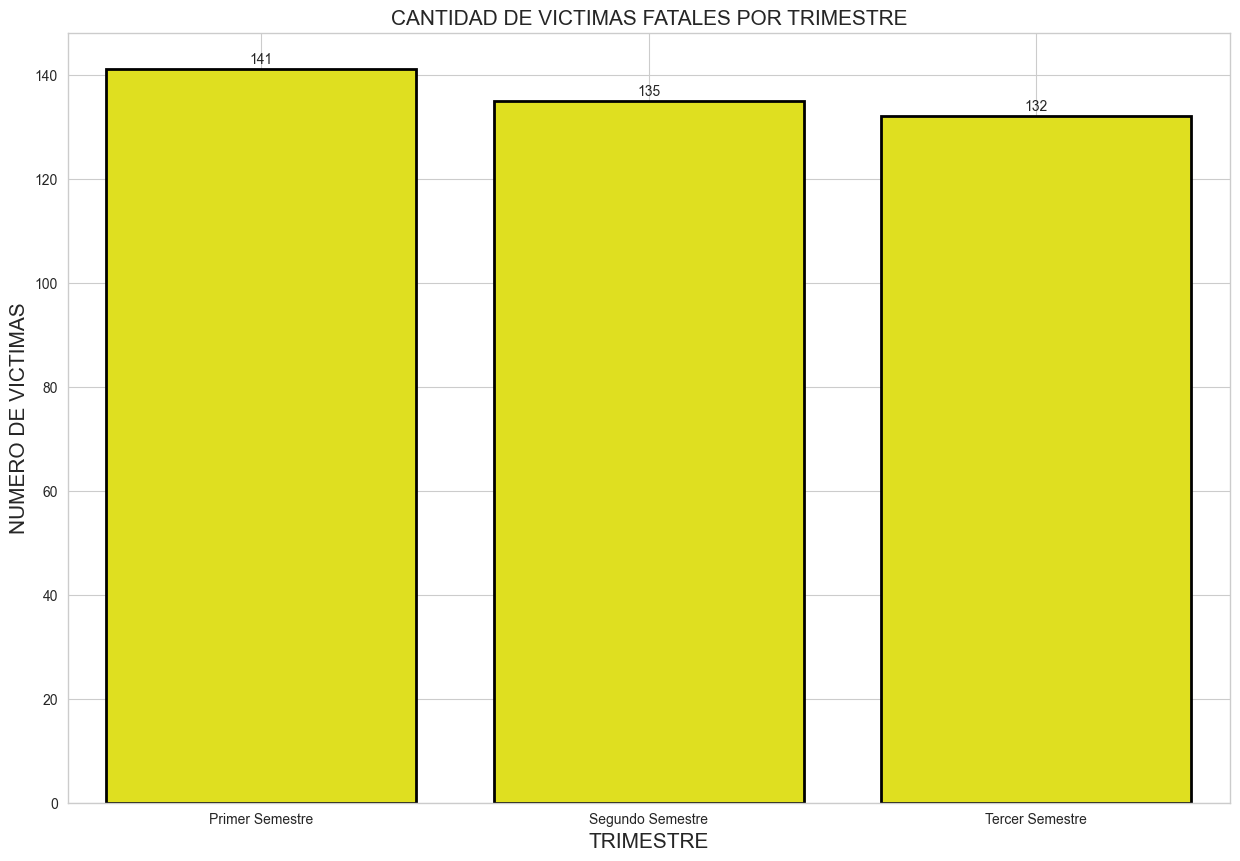

In [154]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df_trimestres, x = 'labels', y = 'trimestres', color = 'yellow', edgecolor ='black', linewidth = 2)

for i, valor in enumerate(df_trimestres['trimestres']):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.title('CANTIDAD DE VICTIMAS FATALES POR TRIMESTRE', fontsize = 15)
plt.xlabel('TRIMESTRE', fontsize=15)
plt.ylabel('NUMERO DE VICTIMAS', fontsize=15)
# Mostrar el gráfico

plt.grid(True)
plt.show()

## **11) Ubicaciones de los incidentes con FOLIUM**

In [133]:
# Creamos un mapa con las coordenadas proporcionadas por el DataFrame y las rotulamos con las direcciones 

mapa = fl.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Añadir marcadores para cada punto del DataFrame
for index, row in df.iterrows():
    fl.Marker(
        [row['Latitude'], row['Longitude']],
        popup=f"Dirección: {row['Address']}"
    ).add_to(mapa)

mapa